# Workshop 1: Data Ingestion

## **Question 1: dlt Version**

In [3]:
!pip install dlt[bigquery]

In [4]:
!dlt --version

dlt 1.6.1


**Answer**:  
- Provide the **version** you see in the output.

- dlt 1.6.1

## **Question 2: Define & Run the Pipeline (NYC Taxi API)**

Use dlt to extract all pages of data from the API.

Steps:

1️⃣ Use the `@dlt.resource` decorator to define the API source.

2️⃣ Implement automatic pagination using dlt's built-in REST client.

3️⃣ Load the extracted data into DuckDB for querying.



Test BigQuery Connection Using Colab Secrets

In [ ]:
import os
import json
from google.cloud import bigquery
from google.colab import userdata


# Retrieve the secret from Colab
bq_key_json = userdata.get('BigQuery')


# Save it as a temporary file
key_path = "/content/bq-key.json"
with open(key_path, "w") as key_file:
    key_file.write(bq_key_json)

# Load the JSON key and extract required fields
with open(key_path) as f:
    credentials = json.load(f)

# Set the environment variables that DLT expects
os.environ["TAXI_DATA__DESTINATION__BIGQUERY__CREDENTIALS__PROJECT_ID"] = credentials["project_id"]
os.environ["TAXI_DATA__DESTINATION__BIGQUERY__CREDENTIALS__PRIVATE_KEY"] = credentials["private_key"]
os.environ["TAXI_DATA__DESTINATION__BIGQUERY__CREDENTIALS__CLIENT_EMAIL"] = credentials["client_email"]

# Set environment variable for BigQuery authentication
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = key_path

# Initialize BigQuery Client
client = bigquery.Client()
print("Authenticated with project:", client.project)


In [25]:
import dlt
from dlt.sources.helpers.rest_client import RESTClient
from dlt.sources.helpers.rest_client.paginators import PageNumberPaginator

@dlt.resource(name="rides", write_disposition="replace")
def ny_taxi():
    client = RESTClient(
        base_url="https://us-central1-dlthub-analytics.cloudfunctions.net",
        paginator=PageNumberPaginator(
            base_page=1,
            total_path=None
        )
    )

    for page in client.paginate("data_engineering_zoomcamp_api"):
        yield page


In [26]:
pipeline = dlt.pipeline(
    pipeline_name='taxi_data',
    destination='bigquery',
    dataset_name='dlt_taxi_rides',
)

Load the data into BigQuery to test:

In [ ]:
load_info = pipeline.run(ny_taxi())
print(load_info)

**Answer:**
* How many tables were created?

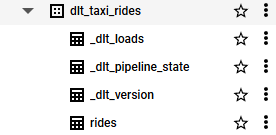

4

## **Question 3: Explore the loaded data**

Inspect the table `ride`:


In [31]:
df = pipeline.dataset(dataset_type="default").rides.df()
df

,end_lat,end_lon,fare_amt,passenger_count,payment_type,start_lat,start_lon,tip_amt,tolls_amt,total_amt,trip_distance,trip_dropoff_date_time,trip_pickup_date_time,surcharge,vendor_name,_dlt_load_id,_dlt_id,store_and_forward
0,40.758275,-73.937818,2.5,208,CASH,40.758278,-73.937825,0.00,0.00,2.50,0.00,2009-06-17 13:07:00+00:00,2009-06-17 13:07:00+00:00,0.0,VTS,1739617520.6876059,fLxiUQLVSx7q+Q,NaN
1,40.745425,-73.972203,2.5,1,CASH,40.745427,-73.972203,0.00,0.00,2.50,0.00,2009-06-11 06:50:00+00:00,2009-06-11 06:50:00+00:00,0.0,VTS,1739617520.6876059,1DM23zN57UfX4g,NaN
2,40.753018,-73.971008,2.5,1,CASH,40.753052,-73.970980,0.00,0.00,2.50,0.00,2009-06-14 17:57:00+00:00,2009-06-14 17:56:00+00:00,0.0,VTS,1739617520.6876059,w8yfpxah1d7oRA,NaN
3,40.758170,-73.937450,2.5,1,CASH,40.758175,-73.937452,0.00,0.00,2.50,0.00,2009-06-11 13:55:00+00:00,2009-06-11 13:55:00+00:00,0.0,VTS,1739617520.6876059,c6rEWiTCgzOqOw,NaN
4,40.802125,-73.950702,2.5,5,CASH,40.802125,-73.950702,0.00,0.00,2.50,0.00,2009-06-22 13:43:00+00:00,2009-06-22 13:43:00+00:00,0.0,VTS,1739617520.6876059,gNZVp8JtKxkjKQ,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40.870670,-73.883128,55.3,1,Credit,40.774185,-73.874622,16.89,4.15,77.34,13.79,2009-06-26 17:50:00+00:00,2009-06-26 16:03:00+00:00,1.0,VTS,1739617520.6876059,PT3J7E8Cltix7A,NaN
9996,40.695272,-74.177487,78.0,1,Credit,40.695270,-74.177483,19.50,0.00,97.50,0.00,2009-06-19 05:28:00+00:00,2009-06-19 05:27:00+00:00,0.0,VTS,1739617520.6876059,/lR0PO5mPq0HQw,NaN
9997,41.069102,-73.548183,170.0,1,Credit,41.069102,-73.548183,20.00,0.00,190.00,0.00,2009-06-02 14:16:00+00:00,2009-06-02 14:15:00+00:00,0.0,VTS,1739617520.6876059,qG8UeDOedQMK3A,NaN
9998,40.912662,-73.783763,90.0,1,Credit,40.912662,-73.783763,22.50,0.00,112.50,0.00,2009-06-29 02:32:00+00:00,2009-06-29 02:31:00+00:00,0.0,VTS,1739617520.6876059,KlYRRlTrQIUG7Q,NaN


**Answer:**
* What is the total number of records extracted?

*   10000




## **Question 4: Trip Duration Analysis**

Run the SQL query below to:

* Calculate the average trip duration in minutes.

In [33]:
with pipeline.sql_client() as client:
    res = client.execute_sql(
            """
            SELECT
              AVG(TIMESTAMP_DIFF(trip_dropoff_date_time, trip_pickup_date_time, MINUTE))
            FROM rides;
            """
        )
    # Prints column values of the first row
    print(res)

[Row((12.298199999999992,), {'f0_': 0})]


**Answer:**
* What is the average trip duration?

- 12.3